# Predicting One's Likelihood of having a Heart Attack 

* by Morrison Fowlks

# About the data
* age
* sex
* cp: chest pain type
* trtbps: resting blood pressure
* chol: cholesterol
* fbs: fasting blood sugar 
* restecg: resting electrocardiographic results
* thalachh: maximum heart rate achieved
* exng: exercise induced angina
* oldpeak: previous peak
* slp: slope
* caa: number of major vessels
* thall: thal rate
* output: target/labels 0 or 1

# Problem Statement:

One will have to complete an exploratory data analysis to predict if a person is prone to a heart attack (being either 0 or 1). 


As seen earlier, this is a classification task as seen in the data provided and problem statement, especially when looking at the prediction needed (if a person is prone to a heart attack (0 or 1)). 

# Step 1

In [12]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

heart_data = pd.read_csv("data.csv")
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


As seen above, there are a total of 14 observations in this dataset. There are no missing values, as seen in the .head() function compared to the actual dataset description. There are 4 unique values in each column. I will treat 'sex', 'cp', 'fbs', 'restecg', 'slp', 'exng', 'caa', 'thall' as categorical, and 'age', 'trtbps', 'chol', 'thalachh', 'oldpeak' as continuous. I sorted the variables into each list depending on their type, one being a continuous and number driven list, and the other being a categorical list, using variables like output. 

# Step 2

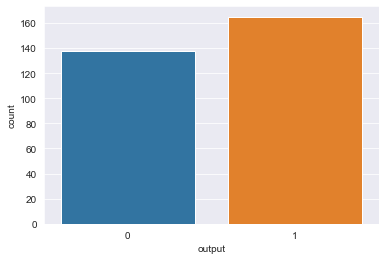

In [14]:
sns.countplot(x=heart_data['output'], data=heart_data)
plt.show()

This dataset is fairly balanced, with the number of people prone to heart attacks being slightly higher than those that are not. It is very important to have a balanced dataset, this is in order to give equal priority to each class of a dataset. To deal with an imbalanced dataset, one can improve classification algorithms or balance classes in the training data during data preprocessing. 

# Step 3

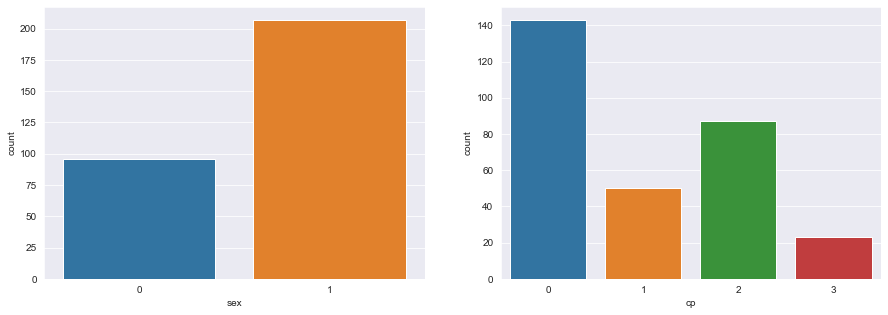

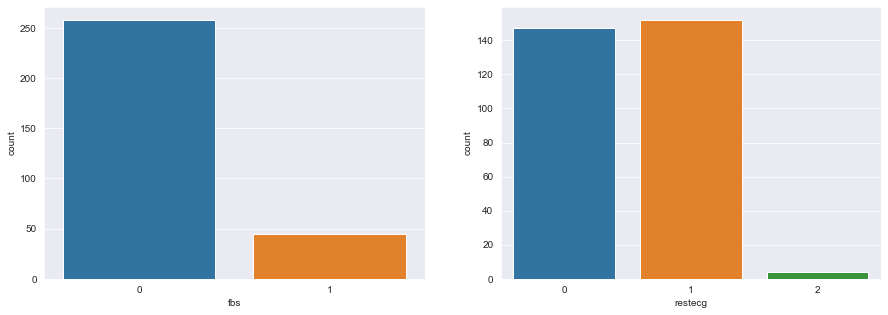

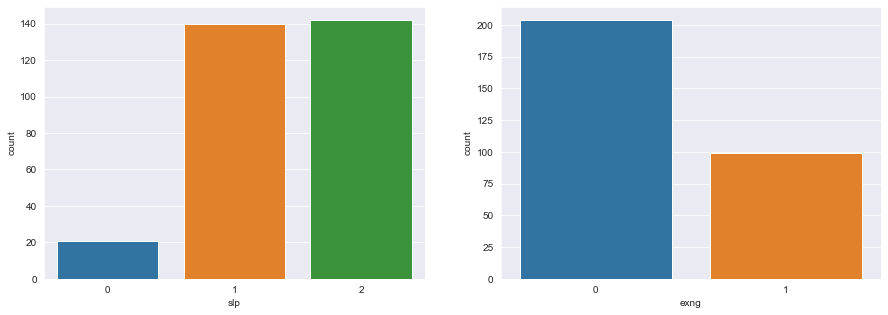

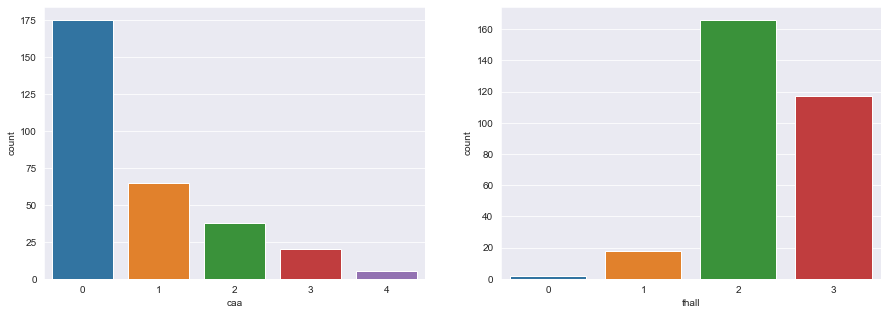

In [58]:
categoricals = ['sex', 'cp', 'fbs', 'restecg', 'slp', 'exng', 'caa', 'thall']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.countplot(x=heart_data['sex'], data=heart_data, ax=axes[0])
sns.countplot(x=heart_data['cp'], data=heart_data, ax=axes[1])
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.countplot(x=heart_data['fbs'], data=heart_data, ax=axes[0])
sns.countplot(x=heart_data['restecg'], data=heart_data, ax=axes[1])
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.countplot(x=heart_data['slp'], data=heart_data, ax=axes[0])
sns.countplot(x=heart_data['exng'], data=heart_data, ax=axes[1])
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.countplot(x=heart_data['caa'], data=heart_data, ax=axes[0])
sns.countplot(x=heart_data['thall'], data=heart_data, ax=axes[1])
plt.show()

There are many interesting findings from the given plots, such as the difference sex has on one's likliehood of having a heart attack. This being that men are much more likely to have a heart attack over women. One can also see that the most common chest pain type would be a typical angina, with non-anginal pain being second. One can also see that fasting blood sugar over 120 mg/dl is false the vast majority of the time. Another interesting find would be that resting electrocardiographic results are slightly more abnormal than normal, but only by a small margin. One can also see that the majority of people in the provided dataset have not experienced exercise induced angina. Finally, another interesting aspect would be that the major blood vessels coloured would primarily be around 0-1, with the majority being 0. 

# Step 4

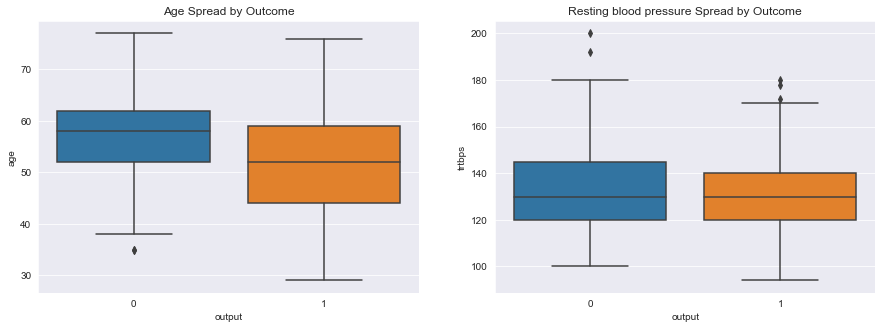

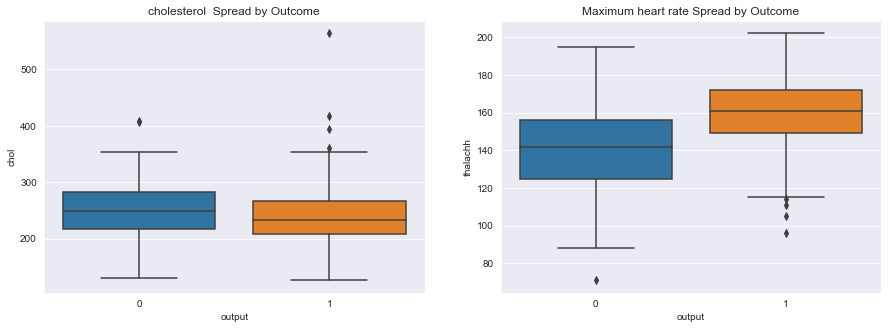

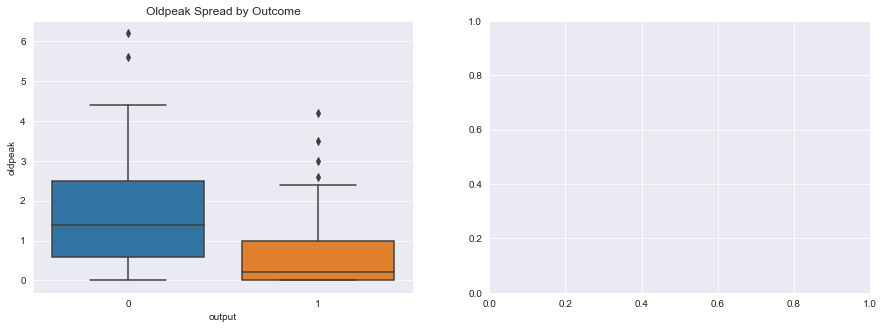

In [71]:
Continuous = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.boxplot(x='output', y='age', data=heart_data, ax=axes[0])
axes[0].set_title('Age Spread by Outcome')

sns.boxplot(x='output', y='trtbps', data=heart_data, ax=axes[1])
axes[1].set_title('Resting blood pressure Spread by Outcome')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.boxplot(x='output', y='chol', data=heart_data, ax=axes[0])
axes[0].set_title('cholesterol  Spread by Outcome')
sns.boxplot(x='output', y='thalachh', data=heart_data, ax=axes[1])
axes[1].set_title('Maximum heart rate Spread by Outcome')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.boxplot(x='output', y='oldpeak', data=heart_data, ax=axes[0])
axes[0].set_title('Oldpeak Spread by Outcome')
plt.show()

Many conclusions can be made when looking at the plots provided. One can see that when looking at age, the range of those prone to a heart attack is very wide, being from the mid 40's up to the early 60's. One can also conclude that the average resting blood pressure is ranged from about 120-140 for both those prone and less prone to heart attacks. One can also see that Cholesterol levels are around 200 to 280 for those prone to heart attacks. One can also see that those prone to heart attacks have a much higher maximum heart rate (150-170) than those that are less likely to have one. Finally, one can see that the ST depression induced by exercise relative to rest for those prone to heart attacks has a very narrow range compared to those that are not, being around 0-1. 

# Step 5

C:\Users\morri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\morri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


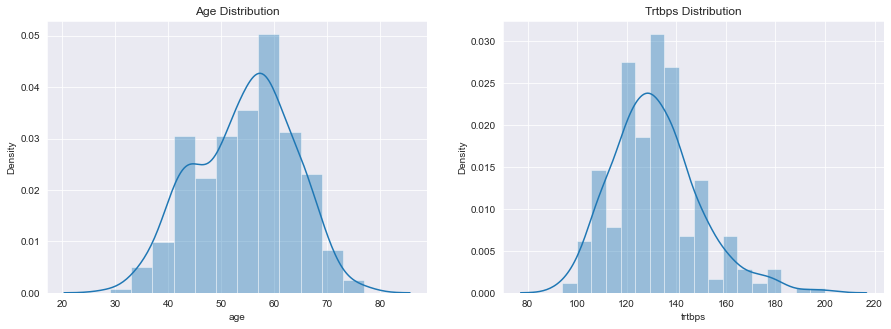

C:\Users\morri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\morri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


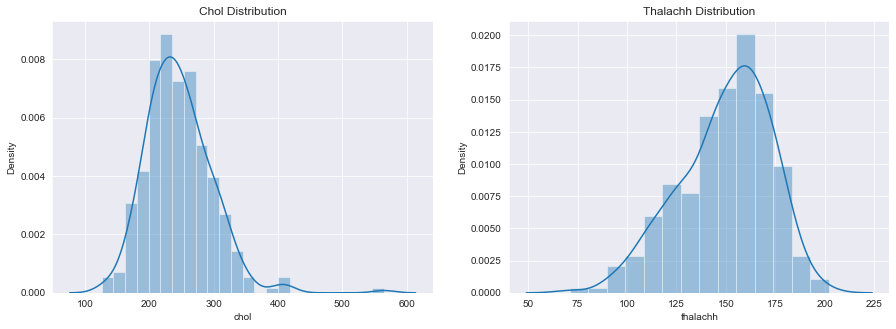

C:\Users\morri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


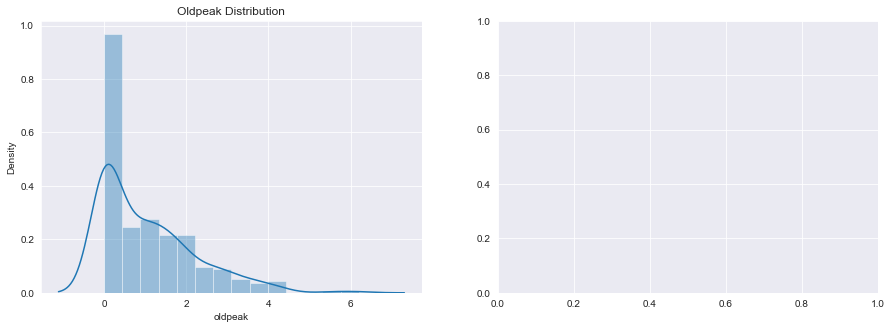

In [68]:
Continuous = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(heart_data['age'], ax=axes[0])
axes[0].set_title('Age Distribution')
sns.distplot(heart_data['trtbps'], ax=axes[1])
axes[1].set_title('Trtbps Distribution')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(heart_data['chol'], ax=axes[0])
axes[0].set_title('Chol Distribution')
sns.distplot(heart_data['thalachh'], ax=axes[1])
axes[1].set_title('Thalachh Distribution')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(heart_data['oldpeak'], ax=axes[0])
axes[0].set_title('Oldpeak Distribution')
plt.show()


Many conclusions can be made surrounding the given plots. One can conclude that the majority of patients in this dataset are in their late 50's to early 60's, as seen in the high density of age in the distribution plot. One can also see that the average resting blood pressure would be 120, 130 and 140, although this distribution graph is a little sporadic. One can also see that the average cholesterol throughout the patients of this dataset is between 200 and 300. One can also see that the average maximum heart rate is between 140 to 175, being relatively high. Lastly, one can conclude that most of the patients have no or close to no ST depression induced by exercise relative to rest.

# Step 6

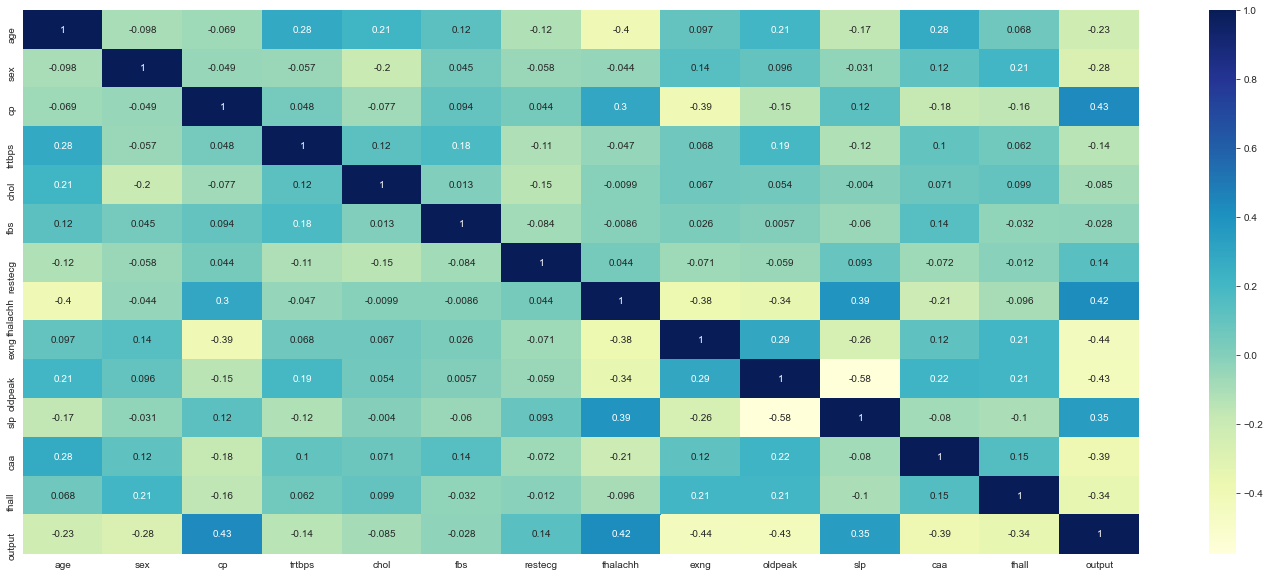

In [13]:
plt.figure(figsize = (25, 10))
sns.heatmap(heart_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

Many conclusions can be made when referring to the provided heatmap created. The most important aspects however, would be in relation to the output, especially when trying to solve the problem statement. One can see that cp, thalachh, slp, and restecg have a relatively high correlation between the output, being how likely one is to have a heart attack. One can also see that there is a high correlation between that of slp and thalachh, having a correlation of 0.39, being one of the highest correlations. Many other variables have low correlations with others, although, none being higher than 0.20.

# Step 7

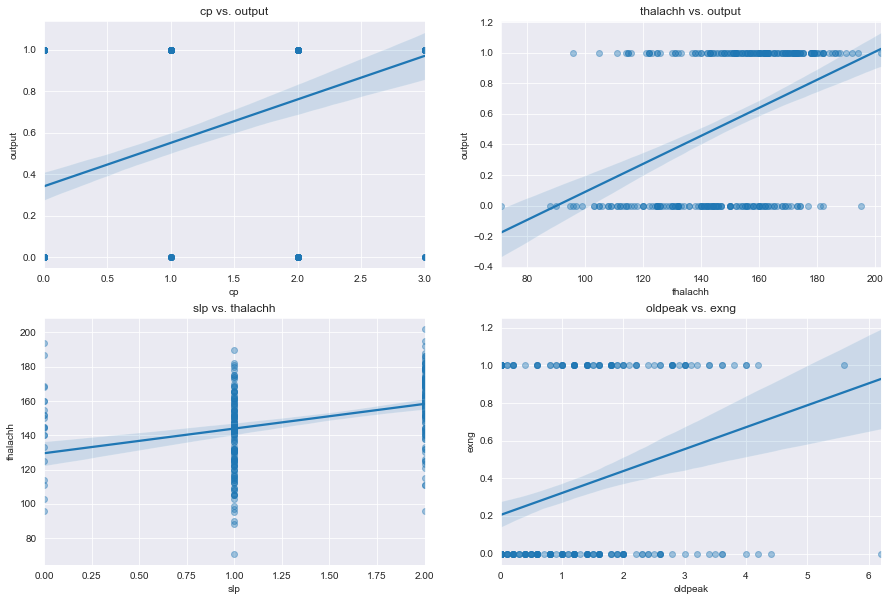

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.regplot(x='cp', y='output', data=heart_data, ax=axes[0][0], scatter_kws={'alpha':0.4})
axes[0][0].set_title('cp vs. output')
sns.regplot(x='thalachh', y='output', data=heart_data, ax=axes[0][1], scatter_kws={'alpha':0.4})
axes[0][1].set_title('thalachh vs. output')
sns.regplot(x='slp', y='thalachh', data=heart_data, ax=axes[1][0], scatter_kws={'alpha':0.4})
axes[1][0].set_title('slp vs. thalachh')
sns.regplot(x='oldpeak', y='exng', data=heart_data, ax=axes[1][1], scatter_kws={'alpha':0.4})
axes[1][1].set_title('oldpeak vs. exng')
plt.show()


Looking at the graphs provided, many conclusions can be made surrounding the relationships of certain variables. With this in mind, after looking at the heatmap of our data, the graph of slp vs thalach can give one major insight. This graph proves that there is a positive relationship between the two variables, with high concentrations of both at 0, 1, and 2. The graphs provided also show that there is also a positive relationship between oldpeak and exng, although with a very high concentration of oldpeak between 0 to 3, and high concentration of 1 for exng. Overall, the graphs provided can give one major insight into the relationships of the variables in our dataset, expanding on what the heatmap illustrated.

# Step 8

Two different models we can use to solve the problem statement would be random forests and logistic regression. The main difference between label encoding and one hot encoding would be that the label encoding categorical feature is ordinal and that the one hot encoding feature is not ordinal. You would use label encoding if the number of categorical features were small, and you would use one hot encoding for relatively larger categorical features. Multicollinearity is when there are high intercorrelations among two or more independent variables in a certain model. We care about multicollinearity because it can produce less reliable probabilities. There are many ways to check if there is significant multicollinearity in our data, like checking the standard errors for regression coefficients and making sure they are not too high, making sure that both the model and other coefficients are both significant, and keeping an eye out for other indicators. Scaling data can be of major importance when analyzing certain datasets. Scaling not only helps with the ease of understanding and interpreting datasets, but in some cases it can also help the accuracy of certain models when analyzing a dataset. Parametric algorithms find a decision boundary in the space of the predictor variables, whereas non-parametric algorithms are primarily used for approximating discrete-valued or real-valued target functions. Random forest models are non-parametric models, whereas logistic regression models are parametric models. There are many ways of handling missing values, such as data cleaning, using a prediction process over classification, using the Naïve Bayes algorithm, evaluating the overall robustness of a model, and many more.

# Step 9

In [15]:
from sklearn.model_selection import train_test_split
X = heart_data[['sex', 'cp', 'slp', 'exng', 'caa', 'thall']]
y = heart_data['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [17]:
y_pred_gini = clf_gini.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7582


In [21]:
y_pred_train_gini = clf_gini.predict(X_train)
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8585
Test set score: 0.7582


In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred_gini))

[[32 11]
 [11 37]]


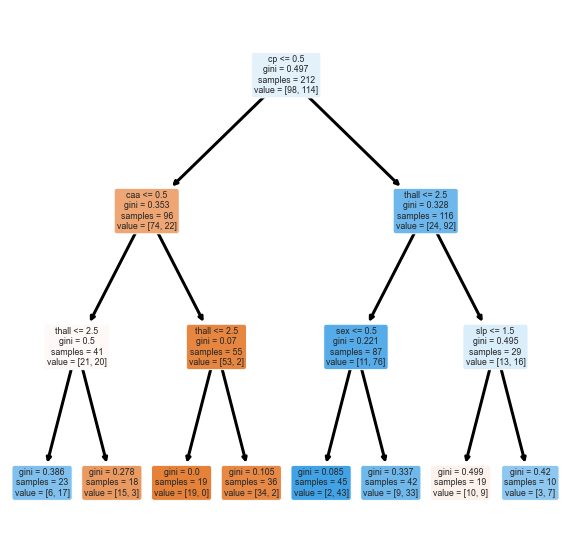

In [217]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf_gini, filled=True, rounded=True,
                     feature_names=['sex', 'cp', 'slp', 'exng', 'caa', 'thall'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [219]:
rfc_pred = rfc.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, rfc_pred)))

Model accuracy score: 0.8462


In [220]:
print(confusion_matrix(y_test,rfc_pred))

[[37  3]
 [11 40]]


In [221]:
from sklearn.model_selection import train_test_split

X = heart_data[['age', 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = heart_data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [222]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [223]:
predictions = logmodel.predict(X_test)

In [224]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        43
           1       0.93      0.88      0.90        48

    accuracy                           0.90        91
   macro avg       0.90      0.90      0.90        91
weighted avg       0.90      0.90      0.90        91

[[40  3]
 [ 6 42]]


After reviewing the many plots, models, and matrices of this dataset analysis, one can see which variables make one prone to a heart attack. Although, before discussing the outcome of this analysis, one should review the models used to get to this point. This analysis consists of three models, a decision tree model, random forest model, and logistic regression model. Before conducting any of these models, no scaling to the data occured, although the variables used were chosen to acquire the best accuracy. The reason these models were used is simple, diversification. An example of this can be seen in the difference between the random forests model and logistic regression model, one being non-parametric and the other being parametric. This diversification was done in hopes to acquire the most accurate model to solve our problem statement. When comparing the models, one can see that the random forests model was much more accurate than that of the decision tree model (being only 0.7582), although, the most accurate model would be that of the logistic regression model. With very high accuracy and precision values, the logistic regression model most accurately displayed the results needed to solve our problem statement. Overall, after looking at this dataset analysis, one can see that chest pain (cp), maximum heart rate achieved (thalachh), the slope of the peak exercise ST segment (slp), and resting electrocardiographic results (restecg) have the highest impact on one's likelihood of having a heart attack. With this in mind, many observations can be made, surroudning the age and sex of those that have had heart attacks, the average maximum heart rate of heart attack victims, and many more. This dataset analysis not only provides insight into the possible variables that lead to a heart attack, but does so to educate the public and hopefully save lives.